In [1]:
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import hashlib
import json
#import jsonlines
import ast

In [2]:
train = pd.read_csv('bank-full.csv', sep=';') # Leitura do arquivo separando por ';'

In [3]:
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Q1: Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [4]:
# Para identificar a profissão com a maior tendência a fazer um empréstimo eu ecnontrei para cada uma das 
# profissões aqueles indivíduos que fizeram o housing, loan e os dois.
# Por fim calculo a porcentagem em relacao ao total de individuos em cada profissão.

In [5]:
yes_loan = train[(train.housing == 'no') & (train.loan == 'yes')] 
g_yes_loan = yes_loan.groupby('job').count()
g_yes_loan = g_yes_loan.drop(['marital','education','default','balance', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y','age', 'housing'], axis=1)
g_yes_loan.loan

job
admin.           387
blue-collar      551
entrepreneur     147
housemaid         92
management       547
retired          208
self-employed     99
services         297
student            8
technician       493
unemployed        46
unknown            2
Name: loan, dtype: int64

In [6]:
yes_housing = train[(train.housing == 'yes') & (train.loan == 'no')] 
g_yes_housing = yes_housing.groupby('job').count()
#g_yes_housing = yes_housing.drop(['marital','education','default','balance', 'contact', 'day', 'month', 
              #'duration', 'campaign','pdays', 'previous', 'poutcome','y','age','loan'], axis=1)
g_yes_housing.housing

job
admin.           2578
blue-collar      5915
entrepreneur      660
housemaid         338
management       3972
retired           390
self-employed     635
services         2227
student           245
technician       3299
unemployed        480
unknown            24
Name: housing, dtype: int64

In [7]:
yes_two = train[(train.housing == 'yes') & (train.loan == 'yes')] 
g_yes_two = yes_two.groupby('job').count()
g_yes_two.loan

job
admin.            604
blue-collar      1133
entrepreneur      209
housemaid          60
management        706
retired           101
self-employed     130
services          539
student             4
technician        816
unemployed         63
unknown             2
Name: loan, dtype: int64

In [8]:
g_tot = train.groupby('job').count()

In [9]:
g_yes_loan.loan = (g_yes_loan.loan/g_tot.age)*100
g_yes_housing.housing = (g_yes_housing.housing/g_tot.age)*100
g_yes_two.loan = (g_yes_two.loan/g_tot.age)*100
tot_per = g_yes_loan.loan + g_yes_housing.housing + g_yes_two.loan

In [10]:
#Res = []
Res = pd.DataFrame([g_tot.index, g_yes_loan.loan, g_yes_housing.housing, g_yes_two.loan, tot_per]).transpose()
Res.columns = ['Job', 'Loan(%)', 'Hounsing(%)','Loan(%)','Total(%)']

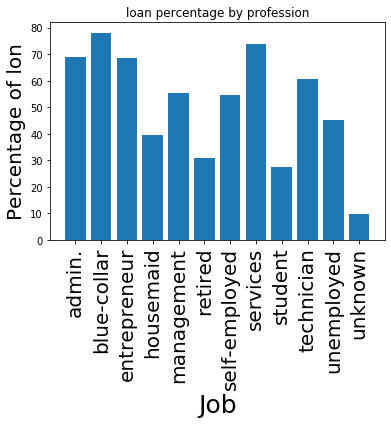


Resposta: A profissão que tem mais tendência a fazer empréstimo é a Blue-collar.


In [11]:
index = np.arange(len(Res))
plt.bar(index, tot_per)
plt.xlabel('Job', fontsize=25)
plt.ylabel('Percentage of lon', fontsize=20)
plt.xticks(index, g_tot.index, fontsize=20, rotation=90)
plt.title('loan percentage by profession')
plt.show()

print('\nResposta: A profissão que tem mais tendência a fazer empréstimo é a Blue-collar.')

# Q2: Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

In [12]:
yes = train[(train.y == 'yes')] 

<function matplotlib.pyplot.show(*args, **kw)>

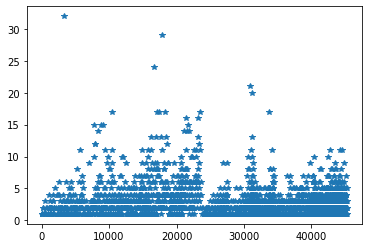

In [13]:
plt.plot(yes.campaign,'*')
plt.show

In [14]:
from statistics import mean
mean(yes.campaign)

2.1410474569861977

In [15]:
len(yes.campaign)

5289

In [16]:
(sum(yes.campaign >= 7)/len(yes.campaign))*100

3.044053696350917

In [17]:
(sum(yes_loan.campaign <= 5)/len(yes_loan.campaign))*100

88.35592631213069

In [18]:
tt_yes = yes.groupby('month').count()
tt_yes.sort_values(by=['y'], ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
month,,,,,,,,,,,,,,,,
may,925,925,925,925,925,925,925,925,925,925,925,925,925,925,925,925
aug,688,688,688,688,688,688,688,688,688,688,688,688,688,688,688,688
jul,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627
apr,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
jun,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546
feb,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441,441
nov,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
oct,323,323,323,323,323,323,323,323,323,323,323,323,323,323,323,323
sep,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269


In [19]:
tt_yes = yes.groupby('campaign').count()
tt_yes.sort_values(by=['y'], ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,pdays,previous,poutcome,y
campaign,,,,,,,,,,,,,,,,
1,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561
2,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401,1401
3,618,618,618,618,618,618,618,618,618,618,618,618,618,618,618,618
4,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317
5,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
6,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
7,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
8,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
9,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21


In [20]:
print('\nResposta: Os pontos relevantes a serem observados são:')
print('(a) Deve ser observado que 88% dos casos de sucesso foram obtidos com menos de 5 contatos.')
print('(b) O melhor momento para entrar em contato com os clientes é no meio do ano entre os meses de Abril e Agosto.')
print('(c) E a chance de sucesso decai com o aumento do número de ligações.')


Resposta: Os pontos relevantes a serem observados são:
(a) Deve ser observado que 88% dos casos de sucesso foram obtidos com menos de 5 contatos.
(b) O melhor momento para entrar em contato com os clientes é no meio do ano entre os meses de Abril e Agosto.
(c) E a chance de sucesso decai com o aumento do número de ligações.


###########################################################

# Q3: Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

In [21]:
yes_calls = train[(train.contact == 'telephone') | (train.contact == 'cellular')] 

<function matplotlib.pyplot.show(*args, **kw)>

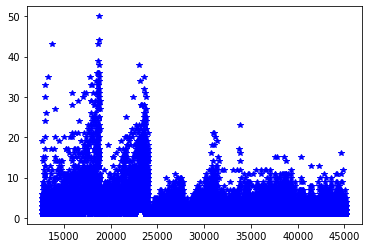

In [22]:
plt.plot(yes_calls.campaign,'b*')
plt.show

In [23]:
import statistics
len(yes_calls)

32191

In [24]:
statistics.mean(yes_calls.campaign)

2.754279146345252

In [25]:
statistics.median(yes_calls.campaign)

2

In [26]:
(sum(yes_calls.campaign <= 3)/len(yes_calls))*100

78.08704296231866

In [27]:
(sum(yes_calls.campaign <= 7)/len(yes_calls))*100

95.02034730204095

In [28]:
print("\nResposta: Eu indicaria um número médio de 3 ligações e um número máximo de 7. Após alguma análises vi que quase 80% do casos de sucesso são fechados com até 3 (mesmo a mediana sendo 2)ligações e apenas 5% com mais que 7 ligações.")


Resposta: Eu indicaria um número médio de 3 ligações e um número máximo de 7. Após alguma análises vi que quase 80% do casos de sucesso são fechados com até 3 (mesmo a mediana sendo 2)ligações e apenas 5% com mais que 7 ligações.


#############################

# Q4: O resultado da campanha anterior tem relevância na campanha atual?

<function matplotlib.pyplot.show(*args, **kw)>

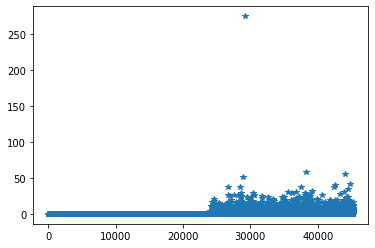

In [29]:
plt.plot(train.previous,'*')
plt.show

In [30]:
sum(train.previous > 0)

8257

In [31]:
sum(yes.previous > 0)

1905

In [32]:
(sum(yes.previous > 0)/sum(train.previous > 0))*100

23.07133341407291

<function matplotlib.pyplot.show(*args, **kw)>

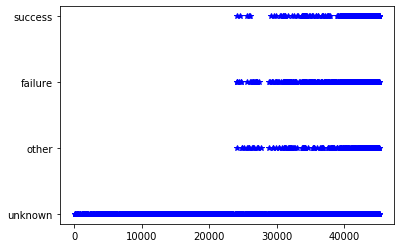

In [33]:
plt.plot(yes.poutcome,'b*')
plt.show

In [34]:
len(yes)

5289

In [35]:
(sum(yes.poutcome == 'success')/len(yes))*100

18.491208167895632

In [36]:
(sum(yes.poutcome == 'failure')/len(yes))*100

11.684628474191719

In [37]:
(sum(yes.poutcome == 'other')/len(yes))*100

5.804499905464171

In [38]:
(sum(yes.poutcome == 'unknown')/len(yes))*100

64.01966345244848

In [39]:
print("\nResposta: Acredito que a campanha anterior tenha relevância na campanha atual porque do total de clientes contatados anteriormente 23% aderiu à campanha. Contudo, 64% dos clientes que foram contatados apresenta como desconhecido o resultado do contato em uma campanha anterior.")


Resposta: Acredito que a campanha anterior tenha relevância na campanha atual porque do total de clientes contatados anteriormente 23% aderiu à campanha. Contudo, 64% dos clientes que foram contatados apresenta como desconhecido o resultado do contato em uma campanha anterior.


#################################

# Q5: Qual o fator determinante para que o banco exija um seguro de crédito?

In [40]:
corr = train.corr()

In [41]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,balance,day,duration,campaign,pdays,previous
age,1,0.098,-0.0091,-0.0046,0.0048,-0.024,0.0013
balance,0.098,1,0.0045,0.022,-0.015,0.0034,0.017
day,-0.0091,0.0045,1,-0.03,0.16,-0.093,-0.052
duration,-0.0046,0.022,-0.03,1,-0.085,-0.0016,0.0012
campaign,0.0048,-0.015,0.16,-0.085,1,-0.089,-0.033
pdays,-0.024,0.0034,-0.093,-0.0016,-0.089,1,0.45
previous,0.0013,0.017,-0.052,0.0012,-0.033,0.45,1


In [42]:
g_q5 = train.groupby('job').mean()
g_q5.sort_values(by=['age'], ascending=False)

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
unknown,47.593750,1772.357639,14.642361,237.611111,3.309028,20.982639,0.319444
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
unemployed,40.961627,1521.745971,15.498081,288.543361,2.432080,34.146585,0.466616
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
technician,39.314598,1252.632092,16.408582,252.904962,2.906805,37.195077,0.574569


In [43]:
g_q52 = train[(train.default == 'yes')]
g_q52 = g_q52.groupby('job').mean()
g_q52.sort_values(by=['age'], ascending=False)

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
retired,56.807692,-134.730769,15.000000,224.730769,2.500000,8.384615,0.038462
unknown,48.500000,-73.500000,11.500000,131.500000,1.500000,-1.000000,0.000000
entrepreneur,41.981818,-46.600000,16.854545,293.927273,2.836364,12.927273,0.163636
housemaid,41.272727,-213.590909,20.045455,311.545455,2.090909,12.681818,0.045455
management,40.969512,-161.957317,17.591463,217.829268,3.396341,18.097561,0.146341
self-employed,39.575758,-210.090909,13.939394,258.787879,2.181818,14.939394,0.090909
unemployed,38.700000,-72.566667,14.866667,172.433333,3.733333,11.366667,0.066667
admin.,38.378378,-95.972973,16.554054,234.621622,3.148649,34.351351,0.297297
technician,38.276923,-28.315385,17.015385,252.469231,3.561538,12.953846,0.523077


In [44]:
g_q54 = train[(train.default == 'yes')]
g_q54 = g_q54.groupby('job').count()
g_q54.sort_values(by=['age'], ascending=False)

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
blue-collar,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
management,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
technician,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
services,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
admin.,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
entrepreneur,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
self-employed,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
unemployed,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
retired,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [45]:
g_q53 = train[(train.default == 'yes')]
g_q53 = g_q53.groupby('marital').count()
g_q53.sort_values(by=['age'], ascending=False)

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
marital,,,,,,,,,,,,,,,,
married,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
single,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
divorced,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


In [46]:
g_q55 = train[(train.default == 'yes')]
g_q55 = g_q55.groupby('education').count()
g_q55.sort_values(by=['age'], ascending=False)

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
education,,,,,,,,,,,,,,,,
secondary,458,458,458,458,458,458,458,458,458,458,458,458,458,458,458,458
tertiary,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198
primary,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
unknown,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [47]:
print('\nResposta: Tive dificuldades em responder esta questão. Tentei olhar para os clientes que possuem crédito pré aprovado e vi que o banco tem poucos estudantes com crédito pré-aprovado. Sendo assim, acho que o fator determinante para fazer um seguro desemprego deve ser a profissão, e talvez a que apresente mais risco sejam os estudantes.')


Resposta: Tive dificuldades em responder esta questão. Tentei olhar para os clientes que possuem crédito pré aprovado e vi que o banco tem poucos estudantes com crédito pré-aprovado. Sendo assim, acho que o fator determinante para fazer um seguro desemprego deve ser a profissão, e talvez a que apresente mais risco sejam os estudantes.


########################################

# Q6: Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [48]:
yes_housing = train[train.housing != 'no']

In [49]:
len_yes = len(yes_housing)

<function matplotlib.pyplot.show(*args, **kw)>

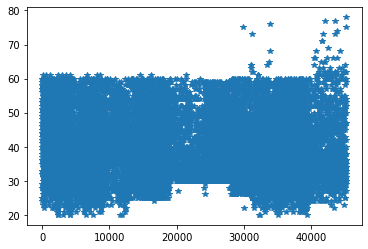

In [50]:
plt.plot(yes_housing.age,'*')
plt.show

In [51]:
yes_housing_age = yes_housing

In [52]:
l = len(yes_housing_age)
for i in range(l):
    if (yes_housing_age.iloc[i,0] <= 30):
        yes_housing_age.iloc[i,0] = 1
    elif (yes_housing_age.iloc[i,0] > 30) and (yes_housing_age.iloc[i,0] < 60):
        yes_housing_age.iloc[i,0] = 2
    else:
        yes_housing_age.iloc[i,0] = 3

/Users/aurelianosancho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
g_age = yes_housing_age.groupby('age').count()
g_age = g_age.sort_values(by=['housing'], ascending=False)
g_age.housing = (g_age.housing/len_yes)*100
g_age = g_age.drop(['job','marital','education','default','balance', 'loan', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_age
g_age.index = ['30 - 60 anos', 'Menos que 30 anos', 'Mais que 60 anos']

In [54]:
g_age.housing

30 - 60 anos         82.821329
Menos que 30 anos    16.116196
Mais que 60 anos      1.062475
Name: housing, dtype: float64

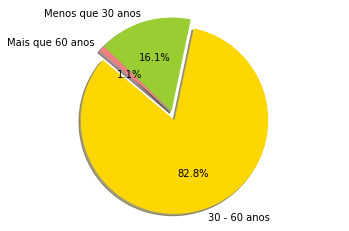

In [55]:
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(g_age.housing, explode=explode, labels=g_age.index, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [56]:
g_job = yes_housing.groupby('job').count()
g_job.housing = (g_job.housing/len_yes)*100
g_job = g_job.drop(['age','marital','education','default','balance', 'loan', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_job.sort_values(by=['housing'], ascending=False)

,housing
job,
blue-collar,28.046160
management,18.615201
technician,16.374851
admin.,12.662157
services,11.006765
entrepreneur,3.458018
self-employed,3.044170
unemployed,2.160764
retired,1.953840


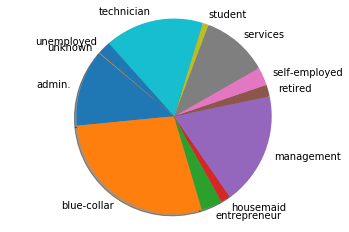

In [57]:
#colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'red', ]
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(g_job.housing, labels=g_job.index, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [58]:
g_marital = yes_housing.groupby('marital').count()
g_marital.housing = (g_marital.housing/len_yes)*100
g_marital = g_marital.drop(['job','education','default','balance', 'loan', 'contact', 'day', 'month', 'age',
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_marital.sort_values(by=['housing'], ascending=False)

,housing
marital,
married,60.966972
single,27.465181
divorced,11.567847


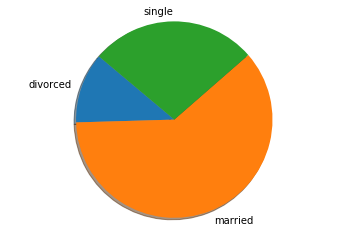

In [59]:
plt.pie(g_marital.housing, labels=g_marital.index, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [60]:
g_education = yes_housing.groupby('education').count()
g_education.housing = (g_education.housing/len_yes)*100
g_education = g_education.drop(['job','marital','default','balance', 'loan', 'contact', 'day', 'month', 'age', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_education.sort_values(by=['housing'], ascending=False)

,housing
education,
secondary,55.861520
tertiary,25.380024
primary,15.495424
unknown,3.263032


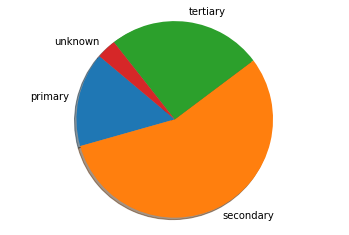

In [61]:
plt.pie(g_education.housing, labels=g_education.index, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

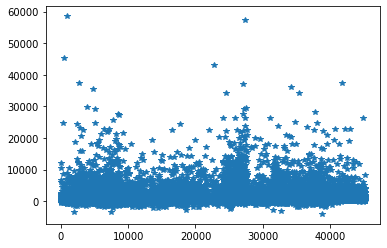

In [62]:
plt.plot(yes_housing.balance,'*')
plt.show

In [63]:
yes_housing_balance = yes_housing

In [ ]:
l = len(yes_housing_balance)
for i in range(l):
    if (yes_housing_balance.iloc[i,5] < 0):
        yes_housing_balance.iloc[i,5] = 1
    elif (yes_housing_balance.iloc[i,5] >= 0) and (yes_housing_balance.iloc[i,5] < 50):
        yes_housing_balance.iloc[i,5] = 2
    elif (yes_housing_balance.iloc[i,5] >= 50) and (yes_housing_balance.iloc[i,5] < 200):
        yes_housing_balance.iloc[i,5] = 3
    elif (yes_housing_balance.iloc[i,5] >= 200) and (yes_housing_balance.iloc[i,5] < 500):
        yes_housing_balance.iloc[i,5] = 4
    elif (yes_housing_balance.iloc[i,5] >= 500) and (yes_housing_balance.iloc[i,5] < 1000):
        yes_housing_balance.iloc[i,5] = 5
    elif (yes_housing_balance.iloc[i,5] >= 1000) and (yes_housing_balance.iloc[i,5] < 10000):
        yes_housing_balance.iloc[i,5] = 6
    else:
        yes_housing_balance.iloc[i,5] = 7

In [ ]:
g_balance = yes_housing_balance.groupby('balance').count()
g_balance.housing = (g_balance.housing/len_yes)*100
g_balance = g_balance.drop(['job','marital','education','default', 'loan', 'contact', 'day', 'month', 'age',
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_balance.sort_values(by=['housing'], ascending=False)
g_balance

In [ ]:
g_balance.index = ['< 0', '50 < 0', '200 < 50', '500 < 200', '1000 < 500', '10000 < 1000', '< 10000']

In [ ]:
plt.pie(g_balance.housing, labels=g_balance.index, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
g_loan = yes_housing.groupby('loan').count()
g_loan.housing = (g_loan.housing/len_yes)*100
g_loan = g_loan.drop(['job','marital','education','default','balance', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y','age'], axis=1)
g_loan.sort_values(by=['housing'], ascending=False)

In [ ]:
plt.pie(g_loan.housing, labels=g_loan.index, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
print('\nResposta: As características mais proeminentes de um cliente que possui empréstimo imobiliário são::')
print('(a) Aproximadamente 82% tem idade entre 30 e 60 anos')
print('(b) Aproximadamente 60% é casado.')
print('(c) Aproximadamente 55% possui nível superior.')
print('(c) Aproximadamente 82% não possui outro empréstimo.')

# Fim